In [12]:
import get_processed_data as gpd
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


# Malte

## Calculate means

In [13]:
# Load data
malte_easy = gpd.get_processed_data('malte', ["3", "4"], 900)
malte_hard = gpd.get_processed_data('malte', ["6", "6+"], 900)


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [14]:
# Acceleration X, Y, Z mean
malte_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_easy]
malte_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_easy]
malte_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_easy]

malte_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_hard]
malte_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_hard]
malte_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_hard]

# Rotation X, Y, Z mean
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]

malte_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_easy_rot]

malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

malte_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_hard_rot]

Calculate acceleration magnitude means

In [15]:
# Calculate acceleration magnitudes
malte_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_easy]
malte_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_hard]

# Calculate acceleration magnitude means
malte_easy_acc_mag_means = [x.mean() for x in malte_easy_acc_mag]
malte_hard_acc_mag_means = [x.mean() for x in malte_hard_acc_mag]

Calculate angular velocity means

In [16]:
# Get rotation matrices
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]
malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

# Calculate rotation differences for each sample
malte_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_easy_rot]
malte_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_hard_rot]

# Convert to rotation vectors
malte_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_easy_rot_diff]
malte_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_hard_rot_diff]

# Calculate magnitude of rotation vectors
malte_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_easy_rot_diff_vec]
malte_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
malte_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_easy_rot_diff_vec_mag]
malte_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

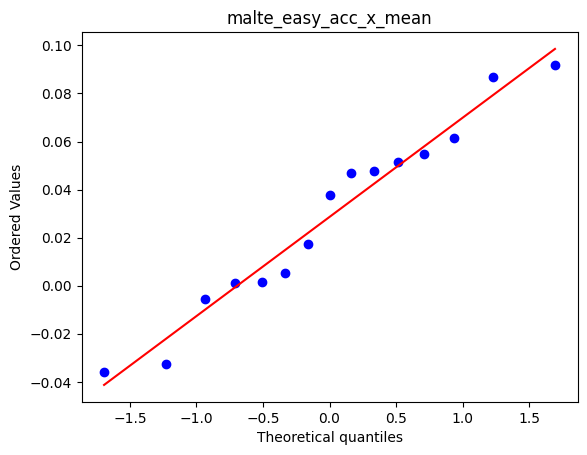

ShapiroResult(statistic=0.954684122470986, pvalue=0.6009752346678241)
Is normally distributed:  True


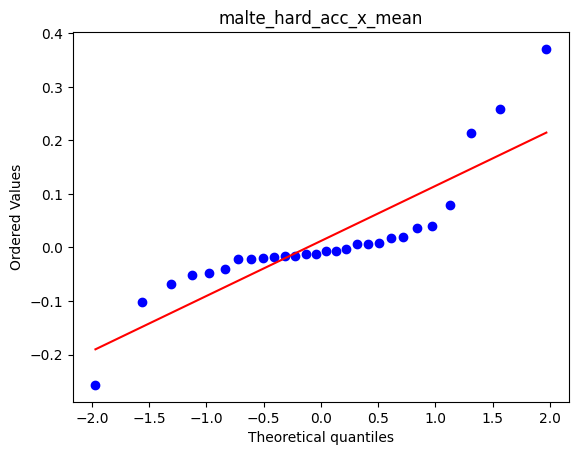

ShapiroResult(statistic=0.7889921039785265, pvalue=6.870000749943025e-05)
Is normally distributed:  False


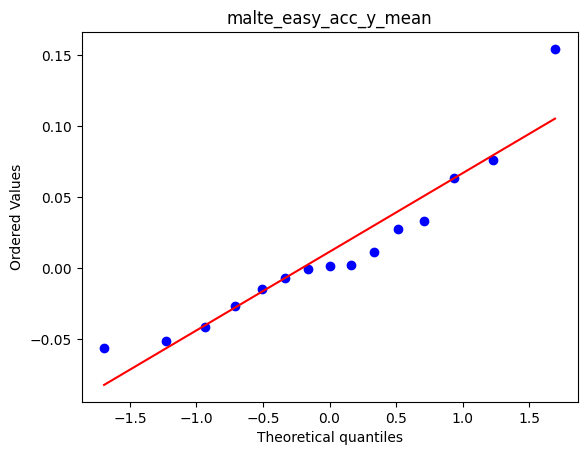

ShapiroResult(statistic=0.906285175902067, pvalue=0.11876729500098666)
Is normally distributed:  True


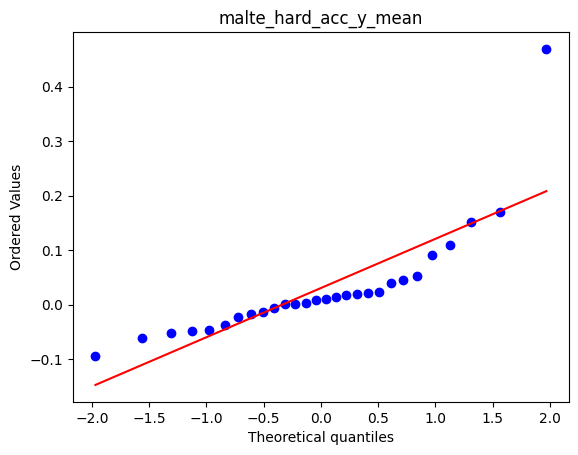

ShapiroResult(statistic=0.7116902870922167, pvalue=4.185850836852492e-06)
Is normally distributed:  False


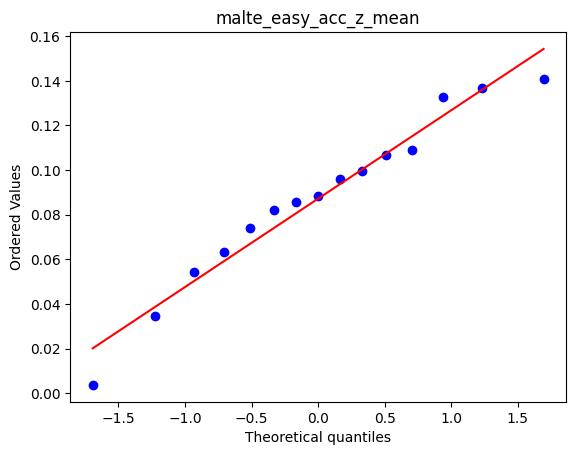

ShapiroResult(statistic=0.9605299336871546, pvalue=0.7016081467944794)
Is normally distributed:  True


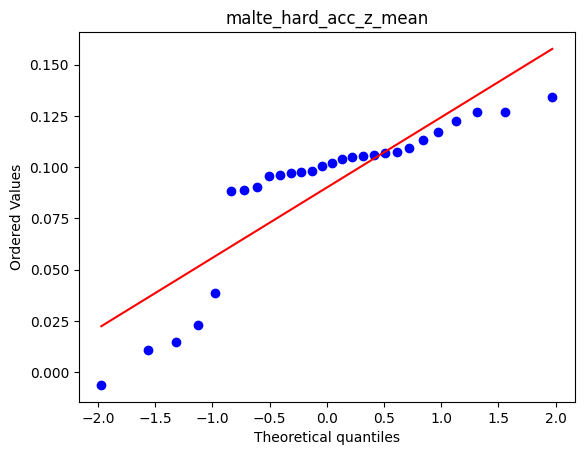

ShapiroResult(statistic=0.7797223046357261, pvalue=4.783492445251872e-05)
Is normally distributed:  False


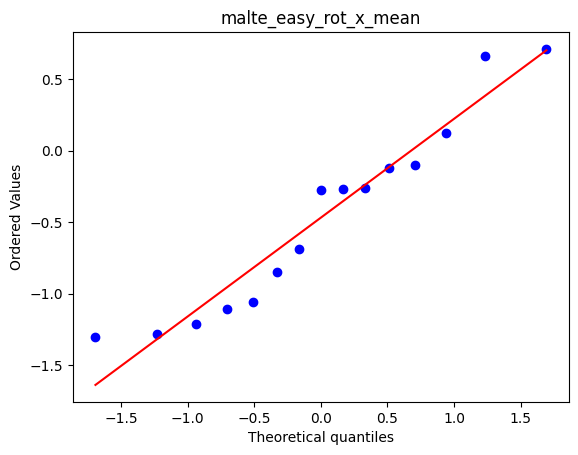

ShapiroResult(statistic=0.919843336615809, pvalue=0.19157715021404575)
Is normally distributed:  True


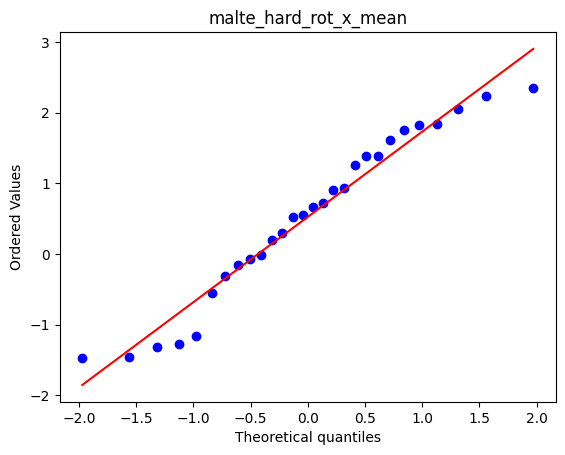

ShapiroResult(statistic=0.9471921457599165, pvalue=0.1683236365462071)
Is normally distributed:  True


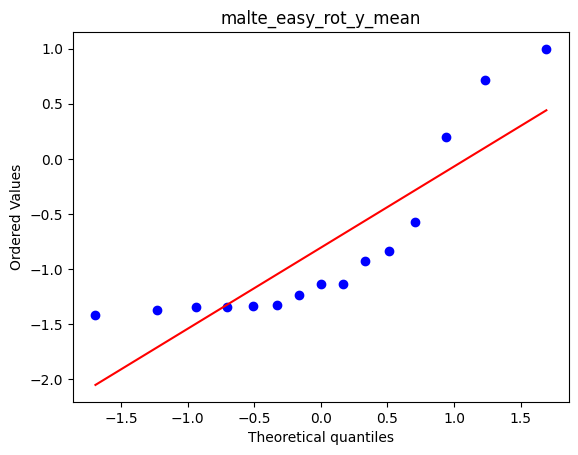

ShapiroResult(statistic=0.7450172071119594, pvalue=0.0007866892467347634)
Is normally distributed:  False


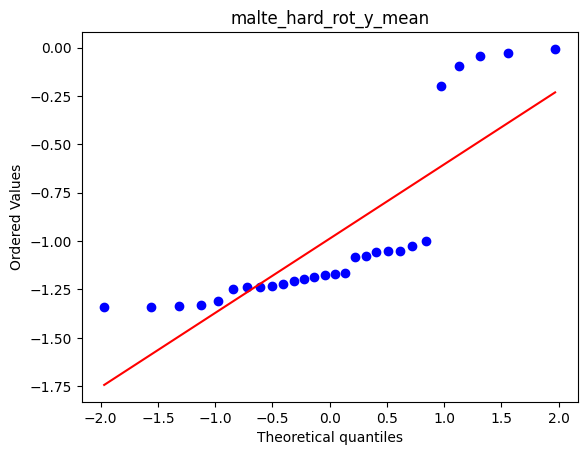

ShapiroResult(statistic=0.6772539505469122, pvalue=1.3811124019088272e-06)
Is normally distributed:  False


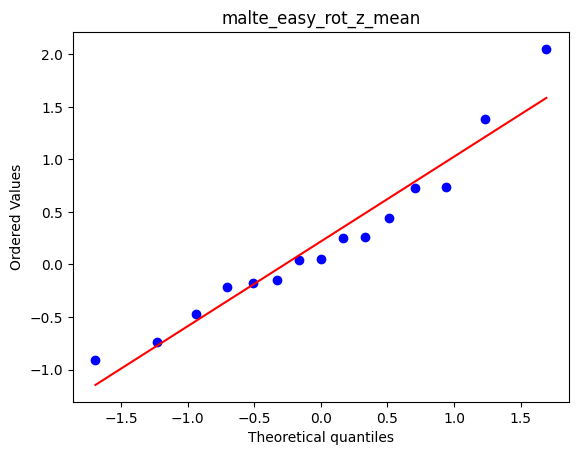

ShapiroResult(statistic=0.9452795030944492, pvalue=0.4533916105656636)
Is normally distributed:  True


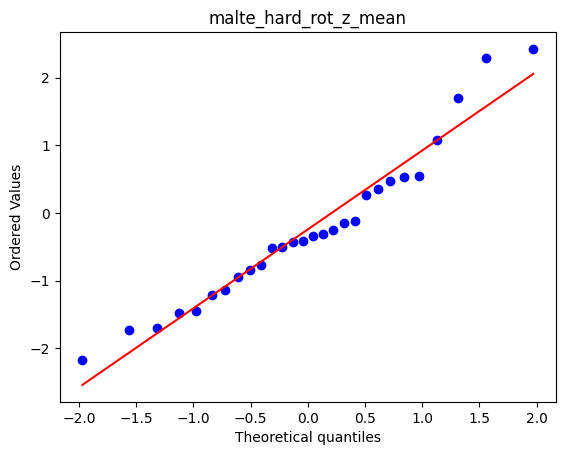

ShapiroResult(statistic=0.9513630713606342, pvalue=0.2143508586415681)
Is normally distributed:  True


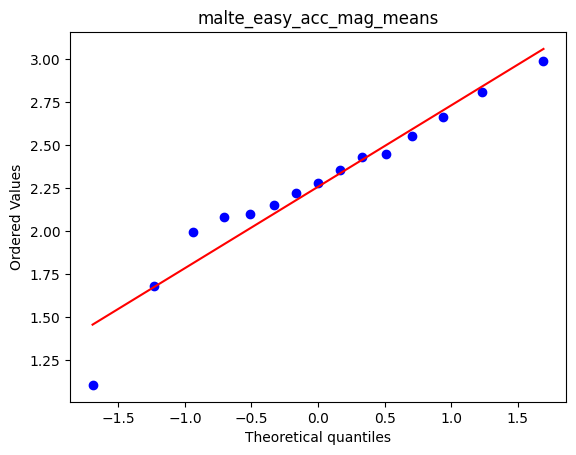

ShapiroResult(statistic=0.9471340555591117, pvalue=0.480497294252271)
Is normally distributed:  True


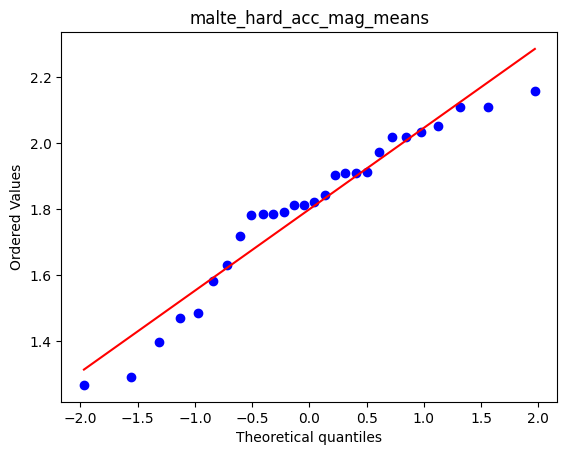

ShapiroResult(statistic=0.9330943866782939, pvalue=0.07381106455160906)
Is normally distributed:  True


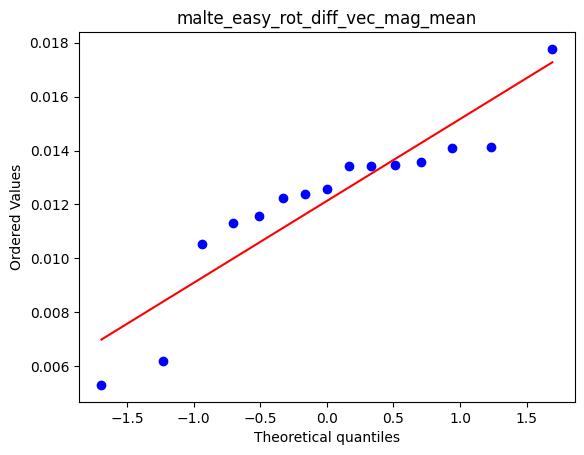

ShapiroResult(statistic=0.8746889055322398, pvalue=0.03956144798427128)
Is normally distributed:  False


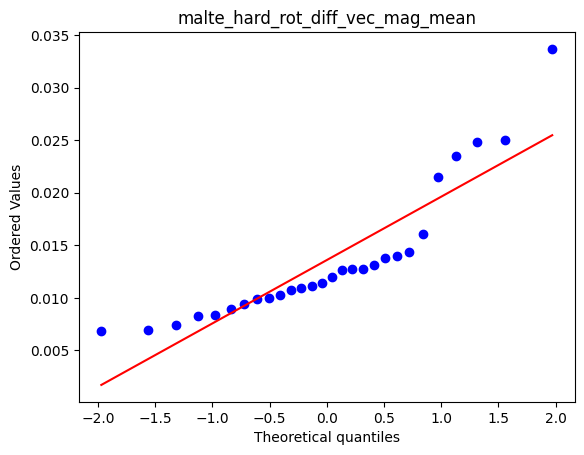

ShapiroResult(statistic=0.815993578076657, pvalue=0.0002070783947865649)
Is normally distributed:  False


In [17]:
alpha = 0.05
features = ["malte_easy_acc_x_mean", "malte_hard_acc_x_mean", "malte_easy_acc_y_mean", "malte_hard_acc_y_mean", "malte_easy_acc_z_mean", "malte_hard_acc_z_mean", "malte_easy_rot_x_mean", "malte_hard_rot_x_mean", "malte_easy_rot_y_mean", "malte_hard_rot_y_mean", "malte_easy_rot_z_mean", "malte_hard_rot_z_mean", "malte_easy_acc_mag_means", "malte_hard_acc_mag_means", "malte_easy_rot_diff_vec_mag_mean", "malte_hard_rot_diff_vec_mag_mean"]

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)


# Luis

## Calculate means

In [18]:
# Load data
luis_easy = gpd.get_processed_data('luis', ["3", "4"], 900)
luis_hard = gpd.get_processed_data('luis', ["5", "5-", "6", "6+"], 900)


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [19]:
# Acceleration X, Y, Z mean
luis_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_easy]
luis_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_easy]
luis_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_easy]

luis_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_hard]
luis_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_hard]
luis_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_hard]

# Rotation X, Y, Z mean
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]

luis_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_easy_rot]

luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

luis_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_hard_rot]

Calculate acceleration magnitude means

In [20]:
# Calculate acceleration magnitudes
luis_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_easy]
luis_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_hard]

# Calculate acceleration magnitude means
luis_easy_acc_mag_means = [x.mean() for x in luis_easy_acc_mag]
luis_hard_acc_mag_means = [x.mean() for x in luis_hard_acc_mag]

Calculate angular velocity means

In [21]:
# Get rotation matrices
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]
luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

# Calculate rotation differences for each sample
luis_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_easy_rot]
luis_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_hard_rot]

# Convert to rotation vectors
luis_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_easy_rot_diff]
luis_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_hard_rot_diff]

# Calculate magnitude of rotation vectors
luis_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_easy_rot_diff_vec]
luis_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
luis_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_easy_rot_diff_vec_mag]
luis_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

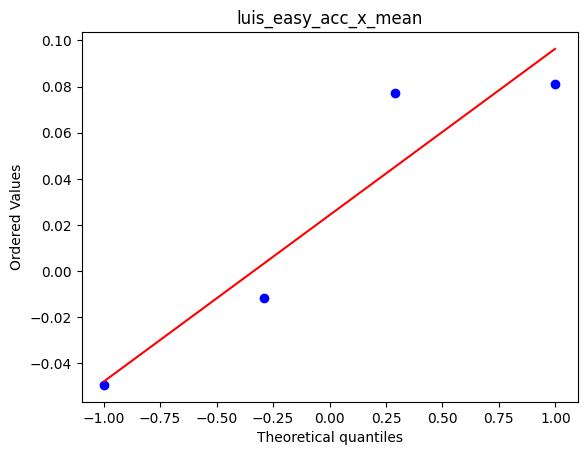

ShapiroResult(statistic=0.8556482688359426, pvalue=0.2449824531312778)
Is normally distributed:  True


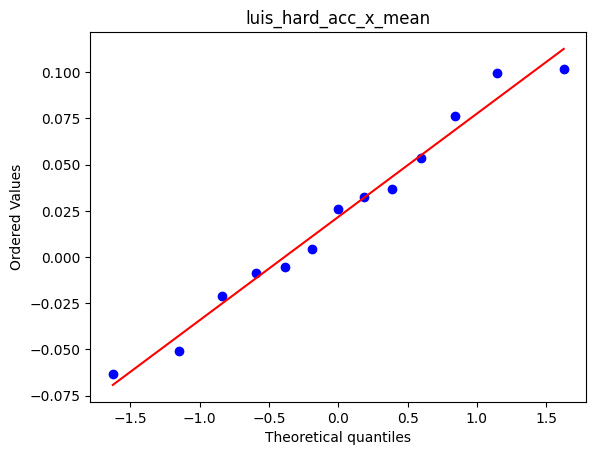

ShapiroResult(statistic=0.9644371729675932, pvalue=0.8202691162747546)
Is normally distributed:  True


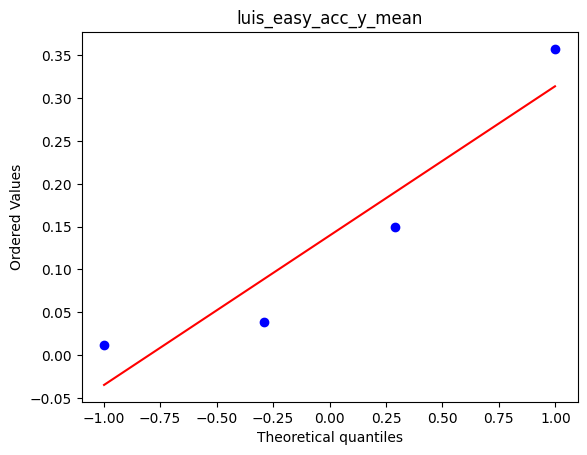

ShapiroResult(statistic=0.8860249440758716, pvalue=0.3650072001835676)
Is normally distributed:  True


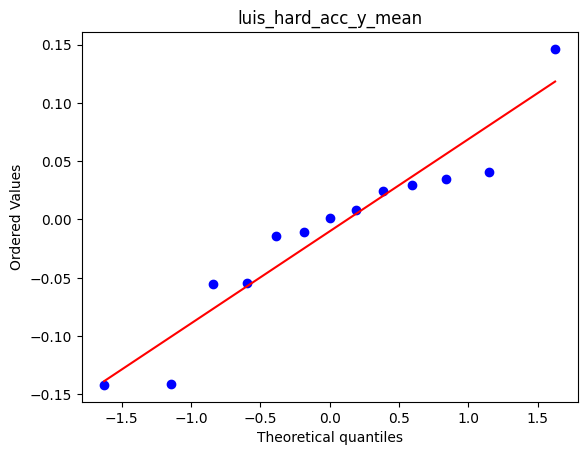

ShapiroResult(statistic=0.9271834397433399, pvalue=0.3129529084831877)
Is normally distributed:  True


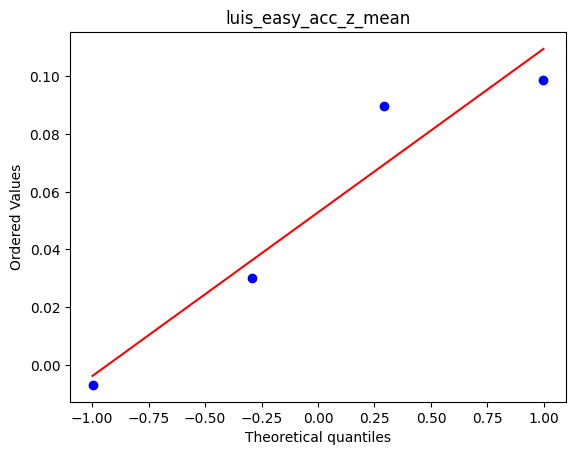

ShapiroResult(statistic=0.9011898760846782, pvalue=0.43699350247098945)
Is normally distributed:  True


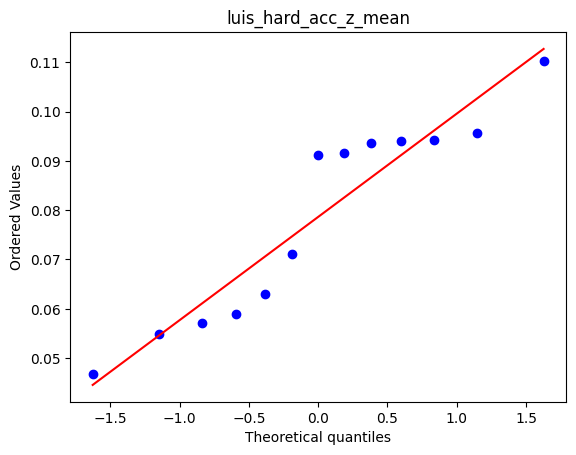

ShapiroResult(statistic=0.8889502011055369, pvalue=0.09437995446226004)
Is normally distributed:  True


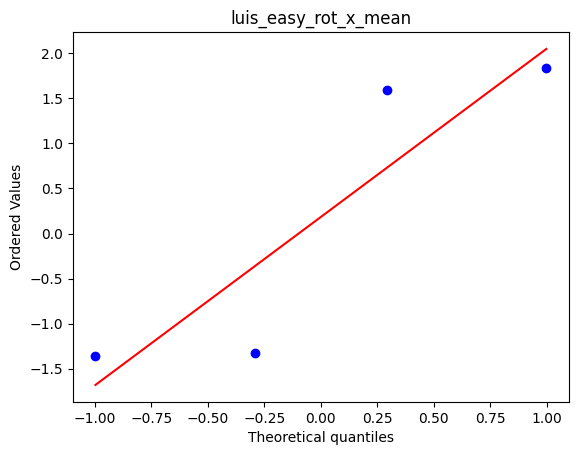

ShapiroResult(statistic=0.7662583325629782, pvalue=0.05419555179944742)
Is normally distributed:  True


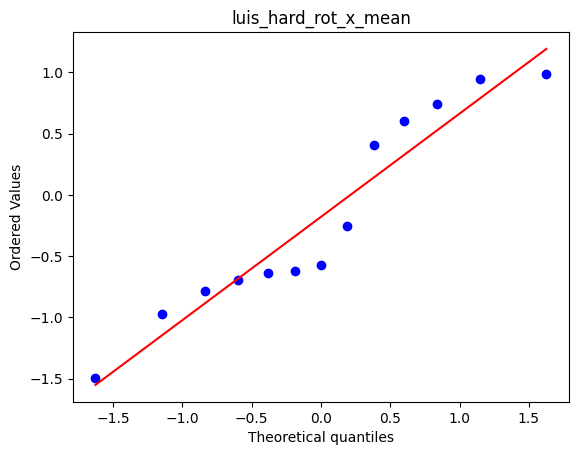

ShapiroResult(statistic=0.9080457919468611, pvalue=0.17242637491767215)
Is normally distributed:  True


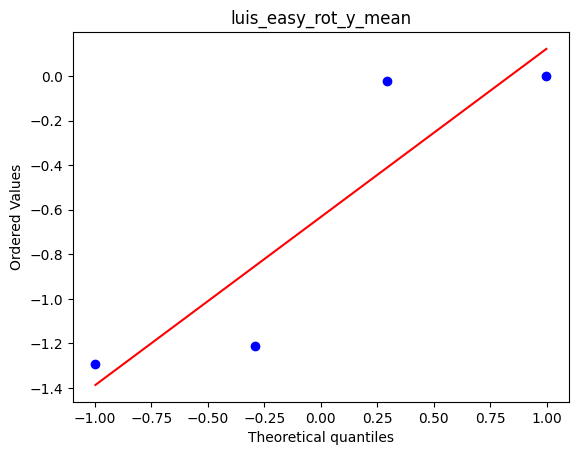

ShapiroResult(statistic=0.7634726359124322, pvalue=0.05122278582002961)
Is normally distributed:  True


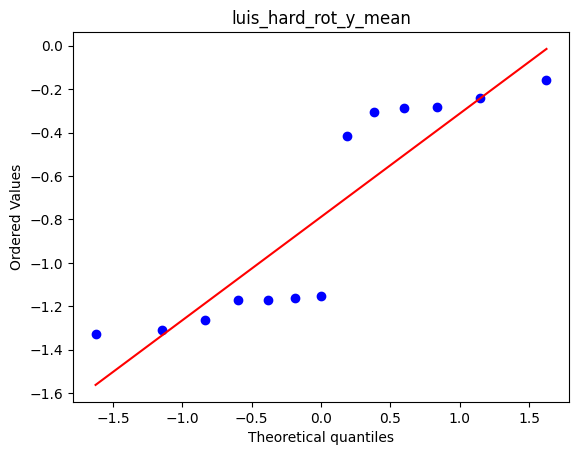

ShapiroResult(statistic=0.7735444450453075, pvalue=0.003362465753108327)
Is normally distributed:  False


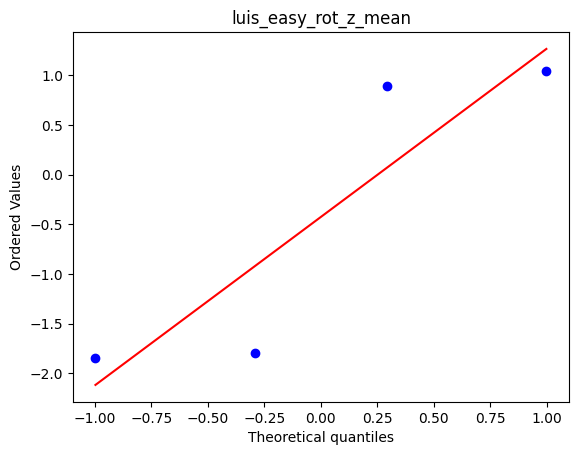

ShapiroResult(statistic=0.7587014805675418, pvalue=0.04643415153484802)
Is normally distributed:  False


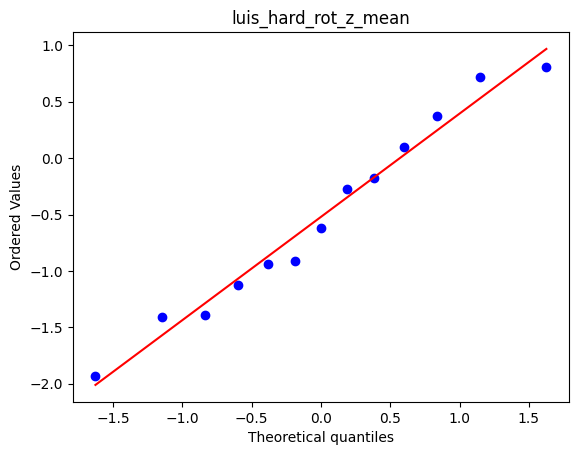

ShapiroResult(statistic=0.9630334973410868, pvalue=0.799701798504608)
Is normally distributed:  True


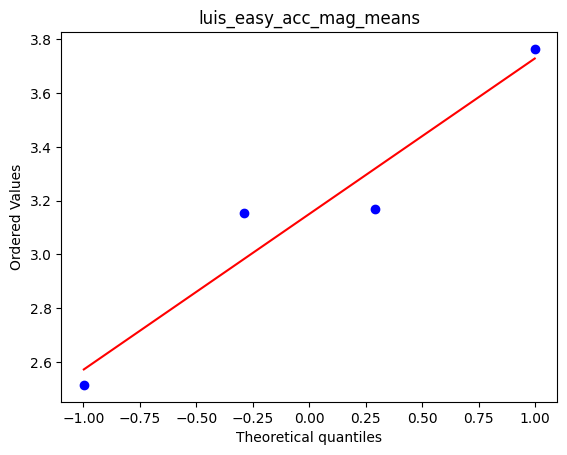

ShapiroResult(statistic=0.9503196110186075, pvalue=0.7181130795465839)
Is normally distributed:  True


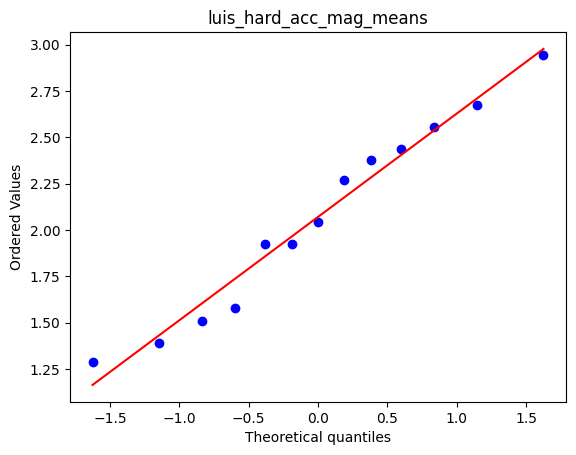

ShapiroResult(statistic=0.9595890825994274, pvalue=0.7473057234370473)
Is normally distributed:  True


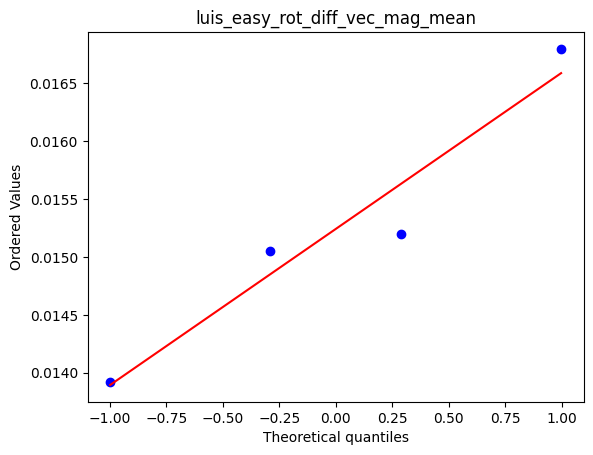

ShapiroResult(statistic=0.9538284880332646, pvalue=0.7400948043626343)
Is normally distributed:  True


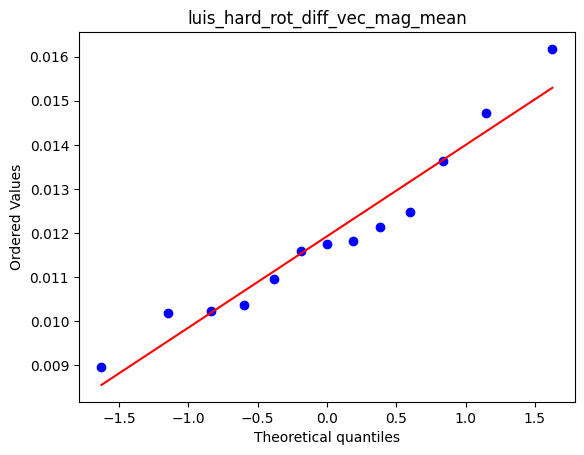

ShapiroResult(statistic=0.9480931018018834, pvalue=0.5696963532991399)
Is normally distributed:  True


In [22]:
alpha = 0.05
features = ["luis_easy_acc_x_mean", "luis_hard_acc_x_mean", "luis_easy_acc_y_mean", "luis_hard_acc_y_mean", "luis_easy_acc_z_mean", "luis_hard_acc_z_mean", "luis_easy_rot_x_mean", "luis_hard_rot_x_mean", "luis_easy_rot_y_mean", "luis_hard_rot_y_mean", "luis_easy_rot_z_mean", "luis_hard_rot_z_mean", "luis_easy_acc_mag_means", "luis_hard_acc_mag_means", "luis_easy_rot_diff_vec_mag_mean", "luis_hard_rot_diff_vec_mag_mean"]

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)
